In [26]:
import sys
import seaborn as sns
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import admin_functions as adfn
import scipy
from scipy import stats 
import IS as isfn
import network_mod as netfn
import avalanches as crfn
import matplotlib
import powerlaw
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

sns.reset_orig()
#plt.style.use('dark_background')
%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 

sys.version

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

# Load Empirical data

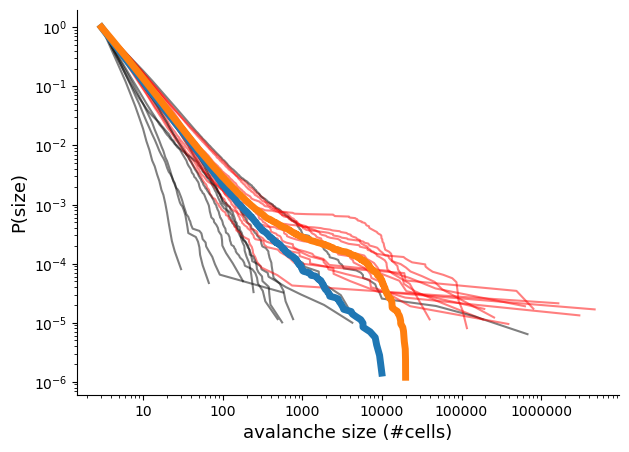

In [2]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_av.npy*'))

import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))

choose = 0

for i in range(len(blnlist)):
    sns.reset_orig()
    avdistcut = np.load(blnlist[i])[0]
    powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.5, c = 'k')
    avdistcut = np.load(p20list[i])[0]
    powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.5, c = 'red')
    
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_vec = []
p20_vec = []
for i in range(len(bln_distlist)):
    bln_vec = np.append(bln_vec, bln_distlist[i][np.where(bln_distlist[i] < 20000)])
    p20_vec = np.append(p20_vec, p20_distlist[i][np.where(p20_distlist[i] < 20000)])

avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =5 , markersize = 1, alpha = 1)
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =5 , markersize = 1, alpha = 1)

axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

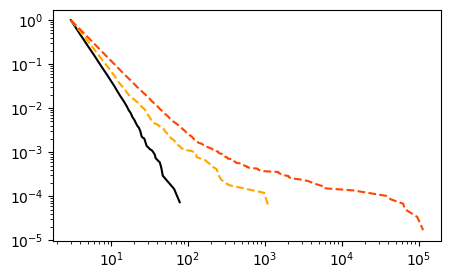

In [2]:
# Choose path and create lists of coord and trace files

# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_randbase*av.npy*'))
prelist = sorted(glob.glob('*PTZ20*_preictal*av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_ictal*av.npy*'))

choose = 0
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
pre_distlist = [np.load(prelist[i])[choose] for i in range(len(prelist))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_vec = []
pre_vec = []
p20_vec = []
for i in range(len(bln_distlist)):
    bln_vec = np.append(bln_vec, bln_distlist[i])
    pre_vec = np.append(pre_vec, pre_distlist[i])
    p20_vec = np.append(p20_vec, p20_distlist[i])
    
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (5,3))
sns.reset_orig()
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'k')
sns.reset_orig()
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orangered')

plt.show()

# Build network
* unconnected nodes from real fish structure
* k-means on all fish warped to same space: k = mean number of cells
* n cells - distance between cells in space

In [ ]:
#Plot all registered cells
fig,axarr = plt.subplots(figsize = (10,10))
comb_coords = np.load(reglist[0])
for i in range(len(reglist)-1):
    comb_coords = np.row_stack((comb_coords,np.load(reglist[i+1])))

spatial_conversion = [.5, .5, 15]
space_coord = np.multiply(comb_coords, spatial_conversion)
axarr.scatter(space_coord[:,0], space_coord[:,1], s = 4, color = 'black' , alpha = 0.03)
plt.show()
#How many cell clusters - mean of all cells used in av calculation
sumd = 0
for i in range(len(coordlist)):
    sumd = sumd + np.load(coordlist[i]).shape[0]
n_clust = np.int(sumd/len(coordlist))
print(str(n_clust))

In [ ]:
#Remove unwanted coords for plotting
x,y = 140, 240 
coordvec = []
for i in range(5):
    x  = x+10
    y = y-10
    xcoord = np.where(space_coord[:,0] > x)[0]
    ycoord = np.where((space_coord[:,1] > y))[0]
    coordvec = np.append(coordvec, np.intersect1d(xcoord,ycoord))
    
remaining = np.where(space_coord[:,1]< 5)
coordvec = np.append(coordvec, remaining)
coordvec = np.unique(coordvec.astype(int))

new_space_coord = np.zeros((space_coord.shape[0] - coordvec.shape[0], 3))
count=0
for i in range(space_coord.shape[0]):
    if i in coordvec:
        continue
    else:
        new_space_coord[count] = space_coord[i]
        count+=1


In [ ]:
#PLot outlier removal
fig,axarr = plt.subplots(figsize = (10,10))
axarr.scatter(space_coord[:,0], space_coord[:,1], s = 4, color = 'grey' , alpha = 0.1)
axarr.scatter(space_coord[:,0][coordvec], space_coord[:,1][coordvec], s = 4, color = 'red' , alpha = 0.1)
plt.show()

fig,axarr = plt.subplots(figsize = (10,10))
axarr.scatter(new_space_coord[:,0], new_space_coord[:,1], s = 4, color = 'grey' , alpha = 0.1)
plt.show()

sumd = 0
for i in range(len(coordlist)):
    sumd = sumd + np.load(coordlist[i]).shape[0]
n_clust = np.int(sumd/len(coordlist))
print(str(n_clust))

In [ ]:
#Kmeans clustering
from sklearn.cluster import KMeans
kmeans   = KMeans(n_clusters=n_clust, random_state=0).fit(new_space_coord)  #perform k means on all cells
klab =  kmeans.labels_
space_coord_labels = np.column_stack((new_space_coord, klab))
np.save(savepath + 'klabels-spaced-coords.npy', space_coord_labels)

In [ ]:
#Average cells by labels to make new cluster
coords = np.load(net[0])
unq = np.unique(coords[:,3]).astype(int)
node_coord = np.zeros((unq.shape[0], 3))
for i in unq:
    data = coords[np.where(coords[:,3] == unq[i])][:,:3]
    node_coord[i] = [sum(x)/len(x) for x in zip(*data)]
np.save(savepath + 'knodes-coords.npy', node_coord)

In [ ]:
fig,axarr = plt.subplots(figsize = (10,10))
coords = np.load(net[0])
axarr.scatter(coords[:,0], coords[:,1], s = 4, color = 'grey' , alpha = 0.05)
axarr.scatter(node_coord[:,0], node_coord[:,1], s = 4, color = 'red' , alpha = 0.3)
plt.show()

# Connect network

## Network types

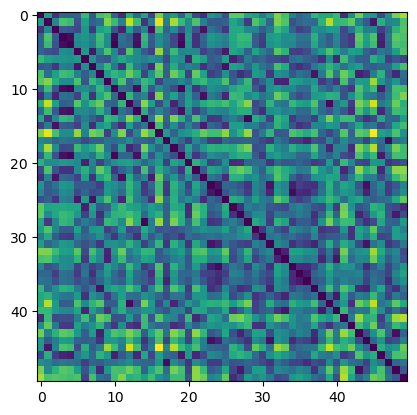

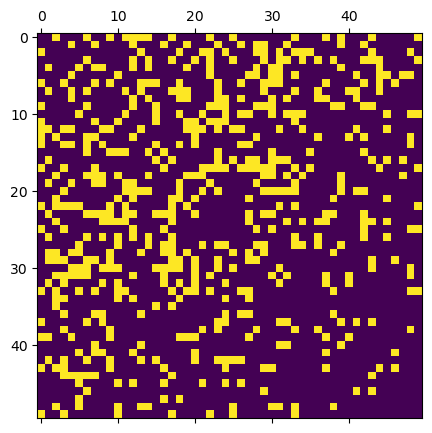

In [5]:
from sklearn.metrics.pairwise import euclidean_distances

#Watts Strogatz - small world network
Nnodes    = 50
cell_locs = np.random.rand(Nnodes, 2)
dist = euclidean_distances(cell_locs)
p = 0.9
k = 10
plt.imshow(dist)
plt.show()

ws = netfn.ws_netsim(dist).net_generate(k, p, 'undirected').A
fig, axarr = plt.subplots(figsize = (5,5))                   
axarr.matshow(ws)
plt.show()

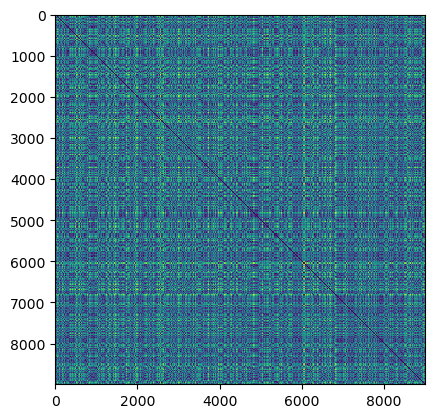

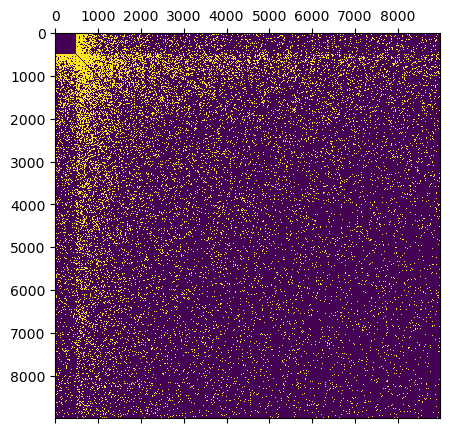

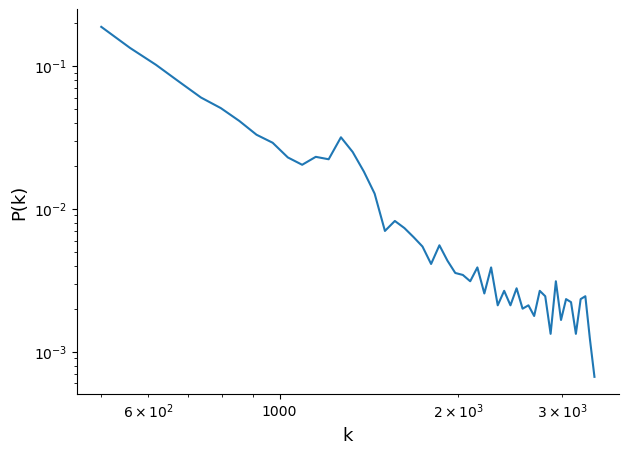

In [5]:
from sklearn.metrics.pairwise import euclidean_distances

os.chdir(Fdrop + 'Project/' + experiment)

node = sorted(glob.glob('knodes*'))
nodes = np.load(node[0])

#Barabasi albert - scale free
Nnodes    = nodes.shape[0]
cell_locs = np.random.rand(Nnodes, 2)
dist = euclidean_distances(cell_locs)
k = 500
plt.imshow(dist)
plt.show()

ba = netfn.ba_netsim(dist).net_generate(k, 'directed').A
fig, axarr = plt.subplots(figsize = (5,5))                   
axarr.matshow(ba)
plt.show()

#Degree distribution
import matplotlib 
fig, axarr = plt.subplots(figsize = (7,5))
avdistcut = np.sum(ba, axis = 1)
hist = np.histogram(avdistcut, bins = 50)
xaxis = hist[1]
yaxis = hist[0]/np.sum(hist[0])
axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('P(k)', size = '13')
axarr.set_xlabel('k', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#plt.savefig('ba_degree.svg', transparent = True)
plt.show()

# Select parameters
* k = edge density, number of nearest neighbours to connect to
* s = edge weight (probability of firing), scaled for distance
* c = clustering coefficient


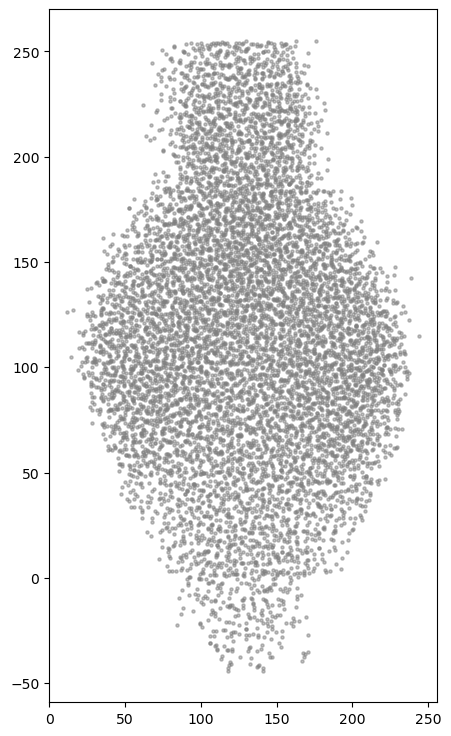

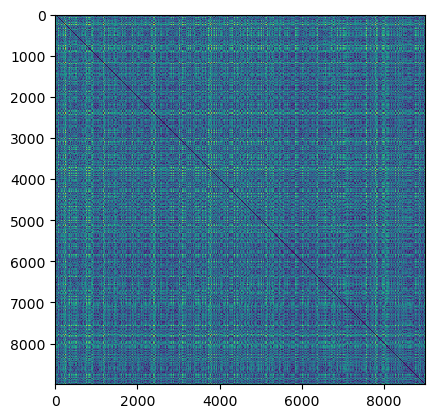

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     

# Node coordinates
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)


node = sorted(glob.glob('knodes*'))
fig,axarr = plt.subplots(figsize = (5,9))
nodes = np.load(node[0])
net_nnb = np.load(sorted(glob.glob('*net_model_nnb*'))[0])
axarr.scatter(nodes[:,1], nodes[:,0], s = 5, color = 'grey' , alpha = 0.5)
#plt.savefig('k_means_brain.png', transparent = True)

plt.show()

dist = euclidean_distances(nodes)
plt.imshow(dist)
plt.show()


In [ ]:
bln = 7, 5
pre = 6, 0 
gen = 31, 1

In [63]:
mini = 0.12

nodes_cv = np.zeros((nodes.shape[0], 4))
nodes_cv[:,0] = np.arange(nodes.shape[0]) 
nodes_cv[:,1] = np.arange(nodes.shape[0]) 
nodes_cv[:,2:] = nodes[:,:2]

k = 7
r = 5
curr = netfn.ba_netsim(dist).adjmat_generate(k, s, r, divisor, soften, 'directed')
A = curr.A
W = curr.adj_mat
rows, cols = np.nonzero(A)
w = W[rows, cols]
scaled_w = (w - mini) * 10

edges_cv = np.zeros((rows.shape[0], 4))

edges_cv[:,0] = rows
edges_cv[:,1] = cols
edges_cv[:,2] = scaled_w
edges_cv[:,3] = scaled_w

np.savetxt("r5_k7_edges.csv", edges_cv, delimiter=",", fmt='%f')
np.savetxt("nodes.csv", nodes_cv, delimiter=",", fmt='%f')

In [67]:
k = 31
r = 1
curr = netfn.ba_netsim(dist).adjmat_generate(k, s, r, divisor, soften, 'directed')
A = curr.A
W = curr.adj_mat
rows, cols = np.nonzero(A)
w = W[rows, cols]

scaled_w = (w - mini) * 10

edges_cv = np.zeros((rows.shape[0], 4))
edges_cv[:,0] = rows
edges_cv[:,1] = cols
edges_cv[:,2] = scaled_w
edges_cv[:,3] = scaled_w

np.savetxt("r1_k31_edges.csv", edges_cv, delimiter=",", fmt='%f')

In [65]:
np.min(scaled_w)

7.192591948285143e-06

In [66]:
np.max(scaled_w)

0.8624617032658038

In [5]:
#Single parameter for scaling and relaxing
# Simple sigmoid function to 'soften' the exponential
#-------------------------------------------------------------------------------
def sig(x):
  return 1 / (1+np.exp(-x))

# Conversion from distance to edge weights, scaled (itself exponentially) by s
#-------------------------------------------------------------------------------
def dist2edge(distance, divisor, s):
  edgeweights = np.exp(s/5)*sig(np.exp(-soften/np.exp(s)*distance))/divisor
  return edgeweights

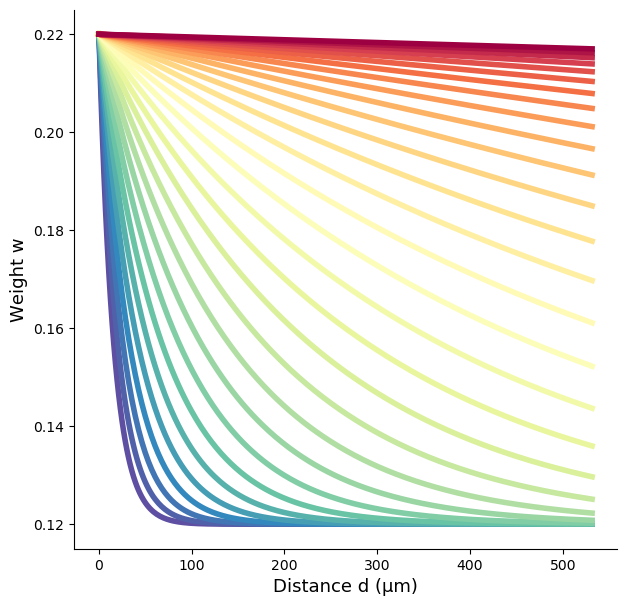

In [28]:
from matplotlib import cm

#Two parameters - one for scaling (s) + one for relaxing (r)
# Conversion from distance to edge weights, scaled (itself exponentially) by s
#s = 1.2, soften = 0.1, divisor = 10
#-------------------------------------------------------------------------------
def dist2edge(distance, divisor, soften, s, r):
    edgeweights = (s + np.exp(-soften/np.exp(r)*distance))/divisor
    return edgeweights


#S parameters
Nsteps  = 30
divisor = 10
soften = 0.1
r_vals   = np.array(np.linspace(0, 7, Nsteps)).tolist()
s = 1.2

#Plot each s value
fig, axarr = plt.subplots(figsize = (7,7))  
colors  = cm.Spectral_r(np.linspace(0,1,Nsteps))
distance = np.linspace(0, np.max(dist), 300)

for r in range(len(r_vals)):
    axarr.plot(distance / 0.625, dist2edge(distance, divisor, soften, s, r_vals[r]) ,  c=colors[r], linewidth = 4)

axarr.set_ylabel('Weight w', size = '13')
axarr.set_xlabel('Distance d (μm)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)   
#plt.savefig(Ffig + 'r_scaling.svg', transparent = True)
plt.show()

# Add dynamics
* network of LIF neurons

In [29]:
import brian2 as b2
from random import sample
from numpy import random

## LIF PARAMETERS
#Network dynamics
sim_time = 400
N = nodes.shape[0] 
v_rest= 0 #Resting potential
t_syn_del = 1 * b2.ms #delay between presynaptic spike and postsynaptic increase
tau_l = 20. * b2.ms #leak time constant - time taken for voltage to reach 63% of resting value
s = 1.2 #Synaptic weights

#External input
N_e = 1000 #number of presynaptic excitatory poisson neurons 
lam = 10 * b2.Hz #poisson rate of external population
w_e= 0.1  #synaptic weight of excitatory external possion neurons onto all neurons 

In [30]:
def stim_net(sim_time, stim_time, n_on, on_ind, input_A, input_W,k, vth, r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e): 

    #Stimulate network
    import brian2 as b2
    from random import sample
    from numpy import random
    import numpy as np

    b2.start_scope()

    #BUILD RECURRENT NET
    # define dynamics for each cell
    lif ="""
    dv/dt = -(v-v_rest) / tau_l : 1 """
    net_dyn = b2.NeuronGroup(
    N, model=lif,
    threshold="v>vth", reset="v = v_rest",
    method="euler")
    net_dyn.v = v_rest #set starting value for voltage

    p_input = b2.PoissonInput(net_dyn, "v", N_e,lam, w_e)

    #Network connectivity + weights
    curr = netfn.ba_netsim(dist).adjmat_generate(k, s, r, divisor, soften, 'directed')
    A = curr.A
    W = curr.adj_mat

    #Build synapses
    net_syn = b2.Synapses(net_dyn, net_dyn, 'w:1', on_pre="v+=w", delay=t_syn_del)
    rows, cols = np.nonzero(A)
    net_syn.connect(i = rows, j = cols)
    net_syn.w = W[rows, cols]

    #Specify input 
    n_input = N
    indices = b2.array(on_ind)
    times = b2.array([stim_time] * n_on)*b2.ms
    input = b2.SpikeGeneratorGroup(n_input, indices, times)

    #Input synapses
    input_syn = b2.Synapses(input, net_dyn, 'w:1', on_pre = "v+=w", delay = 0 * b2.ms)
    input_rows, input_cols = np.nonzero(input_A)
    input_syn.connect(i = input_rows, j = input_cols)
    input_syn.w = input_W[input_rows, input_cols]


    #Store network at steady state
    spike_monitor = b2.SpikeMonitor(net_dyn)
    V = b2.StateMonitor(net_dyn, 'v', record=True)
    sim_time = 400
    b2.run(sim_time*b2.ms)
    spikes_og = spike_monitor.spike_trains()
    bind_og = netfn.bin_data(spikes_og, N, sim_time)
    b2.store()

    #Run network with input
    b2.restore(restore_random_state=True)
    b2.run(sim_time*b2.ms)
    spikes_inp = spike_monitor.spike_trains()
    bind_inp = netfn.bin_data(spikes_inp, N, sim_time*2)

    #Run network without input
    b2.restore(restore_random_state=True)
    input_syn.w = np.zeros(len(input_W[input_rows, input_cols])) #Set weights to 0
    b2.run(sim_time*b2.ms)
    spikes = spike_monitor.spike_trains()
    bind = netfn.bin_data(spikes, N, sim_time*2)
    return(bind, bind_inp, bind_og)

# Fit model
* k = 5 - 40 edges
* vth = 15 - 22
* r = 0 - 7
* cost function - bln/pre: cost_mean, p20: cost_max 

In [6]:
os.chdir(F10t + 'Project/' + experiment)
grid_list = sorted(glob.glob('*grid_search_av_nit9_*'))
grid_list[:10]

['grid_search_av_nit9_k-05_vth-15_r0-7.npy',
 'grid_search_av_nit9_k-05_vth-16_r0-7.npy',
 'grid_search_av_nit9_k-05_vth-17_r0-7.npy',
 'grid_search_av_nit9_k-05_vth-18_r0-7.npy',
 'grid_search_av_nit9_k-05_vth-19_r0-7.npy',
 'grid_search_av_nit9_k-05_vth-20_r0-7.npy',
 'grid_search_av_nit9_k-06_vth-15_r0-7.npy',
 'grid_search_av_nit9_k-06_vth-16_r0-7.npy',
 'grid_search_av_nit9_k-06_vth-17_r0-7.npy',
 'grid_search_av_nit9_k-06_vth-18_r0-7.npy']

In [14]:
def run_par_sim(r, sim_time, k, v_th, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e, net_nnb):
    av_size, av_dur = [],[]
    for i in range(9):
        bind, spikes, volt, spike_mon = netfn.run_net(sim_time, int(k), int(v_th), r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
        av,pkg = crfn.avalanche_r(net_nnb, bind)
        av_size = np.append(av_size, av[0])
        av_dur = np.append(av_dur, av[1])
    return(av_size, av_dur)

def sort_list(ok):
    count=0
    for i in range(len(ok)):
        for e in range(len(ok[i])):
            count+=1
    new_list = list(range(count))
    n_count = 0
    for i in range(len(ok)):
        new_list[n_count] = ok[i][0]
        n_count+=1
    for i in range(len(ok)):
        new_list[n_count] = ok[i][1]
        n_count+=1
    return(new_list)

In [46]:
k_vals = np.arange(28, 34, 1)
vth_vals = np.arange(15, 21, 1)
r_vals = np.arange(0, 8, 1)
k_vals, vth_vals, r_vals

(array([28, 29, 30, 31, 32, 33]),
 array([15, 16, 17, 18, 19, 20]),
 array([0, 1, 2, 3, 4, 5, 6, 7]))

In [ ]:
savepath = F10t + 'Project/' + experiment + os.sep 

for i in range(len(k_vals)):
    for x in range(len(vth_vals)):
        param_list = [sim_time, k_vals[i],  vth_vals[x], s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e, net_nnb]
        ok_s, ok_d = adfn.parallel_func(4, savepath, list(r_vals), run_par_sim, param_list, 'na', 'na', 'NA')
        if len(str(k_vals[i])) == 1:
            name = 'k-0' + str(k_vals[i]) + '_vth-' + str(vth_vals[x])
        else:
            name = 'k-' + str(k_vals[i]) + '_vth-' + str(vth_vals[x])
        np.save(savepath + os.sep + 'grid_search-2_av_nit9_' + name  + '_r0-7_size.npy', ok_s)
        np.save(savepath + os.sep + 'grid_search-2_av_nit9_' + name  + '_r0-7_dur.npy', ok_d)
    print('Done k-' + str(k_vals[i]))

Done k-28
Done k-29
Done k-30
Done k-31
Done k-32


In [7]:
#Combine into one giant list
av_list = list(range(len(grid_list)*8))
count = 0
for i in range(len(grid_list)):
    for e in range(8):
        k = grid_list[i][grid_list[i].find('k-')+2:grid_list[i].find('k-')+4]
        vth = grid_list[i][grid_list[i].find('vth-')+4:grid_list[i].find('vth-')+6]
        r = e
        av_list[count] = [[k, vth, r], np.load(grid_list[i], allow_pickle=True)[e]]
        count+=1

In [21]:
os.chdir(Fdrop + 'Project/' + experiment)
run1_str = sorted(glob.glob('*brute*optimise*bln.*'))[0]
run2_str  = sorted(glob.glob('*brute*optimise*pre.*'))[1]
run1_str, run2_str

('brute_optimise_max_bln.npy', 'brute_optimise_mean_pre.npy')

In [22]:
length = 1225
comb_run = list(range(length))
    
curr1 = np.load(run1_str, allow_pickle=True)
curr2 = np.load(run2_str, allow_pickle=True)
for i in range(length):
    entry_list = list(range(2))
    entry_list[0] = curr1[i][0]
    entry_list[1] = np.append(curr1[i][2][0], curr2[i][2][0])
    comb_run[i] = entry_list

In [48]:
k_vals = np.arange(5, 40, 4)
v_th_vals = np.arange(10,22, 2)
r_vals = np.arange(0,7, 1)

In [10]:
# COST LANDSCAPE - COARSE SWEEP
cost_max_vec = np.zeros((len(k_vals), len(v_th_vals), len(r_vals)))
cost_mean_vec = np.zeros((len(k_vals), len(v_th_vals), len(r_vals)))
for k_c, k in enumerate(k_vals):
    for v_th_c, v_th in enumerate(v_th_vals):
        for r_c, r in enumerate(r_vals):
            bind, spikes, volt = netfn.run_net(sim_time, k, v_th, r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
            av,pkg = crfn.avalanche_r(net_nnb, bind)
            cost_max, cost_mean = netfn.ks_log(av[0], bln_vec)
            cost_max_vec[k_c][v_th_c][r_c] = cost_max
            cost_mean_vec[k_c][v_th_c][r_c] = cost_mean
    print('Done k - ' + str(k))
np.save(Fdrop + 'Project/' + experiment + os.sep + 'paramsweepbln_cost_max', cost_max_vec)
np.save(Fdrop + 'Project/' + experiment + os.sep + 'paramsweepbln_cost_mean', cost_mean_vec)

Done k - 5
Done k - 9
Done k - 13
Done k - 17
Done k - 21
Done k - 25
Done k - 29
Done k - 33
Done k - 37


In [24]:
os.chdir(Fdrop + 'Project/' + experiment)
bln_sweep_max = sorted(glob.glob('*bln_cost_max*'))
bln_sweep_mean = sorted(glob.glob('*bln_cost_mean*'))
pre_sweep_max = sorted(glob.glob('*pre_cost_max*'))
pre_sweep_mean = sorted(glob.glob('*pre_cost_mean*'))
bln_sweep_max

['paramsweepbln_cost_max.npy']

In [ ]:
#NON-CONVEX FUNCTION - MULTIPLE LOCAL MINIMA
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
data_mat = np.load(bln_sweep_mean[0])
plt.figure(figsize=(6,6))
for i in range(len(k_vals)):
    curr = data_mat[i]
    plt.subplot(3,3,i+1)
    plot1 = plt.imshow(curr, cmap = 'coolwarm')
    plt.gca().set_title('k = ' + str(k_vals[i]))
    #plt.gca().set_xlabel('r', size = '15')
    #plt.gca().set_ylabel('v_th', size = '15')
    plt.gca().locator_params(axis='y', nbins=len(v_th_vals))
    plt.gca().locator_params(axis='x', nbins=len(r_vals))
    plt.gca().set_xticklabels(np.append(0,  r_vals) , fontsize = 10)
    plt.gca().set_yticklabels(np.append(0,v_th_vals), fontsize = 10)
plt.show()

### Model - dimensionality

In [31]:
bln_k = 7
bln_vth = 20
bln_r = 5
bln_k, bln_vth, bln_r

(7, 20, 5)

In [32]:
pre_k = 6
pre_vth = 16
pre_r = 0
pre_k, pre_vth, pre_r

(6, 16, 0)

In [33]:
o_k = 30
o_vth = 16
o_r = 0
o_k, o_vth, o_r

(30, 16, 0)

In [34]:
ov_k = 6
ov_vth = 15
ov_r = 0
ov_k, ov_vth, ov_r

(6, 15, 0)

In [35]:
or_k = 6
or_vth = 16
or_r = 7
or_k, or_vth, or_r

(6, 16, 7)

In [36]:
sz_k = 31
sz_vth = 17
sz_r = 1
sz_k, sz_vth, sz_r

(31, 17, 1)

In [191]:
def dim(data):
    cov = np.cov(data)
    eig = np.linalg.eigvals(cov)
    output = (((np.sum(eig))**2)/ (np.sum(eig**2))) / eig.shape[0]
    return(output)

In [192]:
datalist = list(range(6))
klist, vthlist, rlist = [bln_k, pre_k, sz_k, o_k, ov_k, or_k],[bln_vth, pre_vth, sz_vth, o_vth, ov_vth, or_vth],[bln_r, pre_r, sz_r, o_r, ov_r, or_r]
for e in range(6):
    curr_list = list(range(50))
    for i in range(50):
        bind, spikes, volt, spike_mon = netfn.run_net(sim_time, klist[e], vthlist[e], rlist[e], 
                                                  s, divisor, soften, N, dist, v_rest, 
                                                  t_syn_del, tau_l, N_e, lam, w_e)
        dimen = dim(bind.T)
        curr_list[i] = dimen
        
    datalist[e] = curr_list
    print('Done ' + str(e))
np.save(savepath + 'model_dimensionality.npy', datalist)

Done 0
Done 1
Done 2
Done 3
Done 4
Done 5


In [193]:
import pandas as pd

dims = list(range(300))
cond = list(range(300))

cond_list = ['BLN', 'PRE', 'GEN', 'K', 'VTH', 'R']
count=0
e_count = 0
for i in range(len(datalist)):
    for x in range(len(datalist[i])):
        dims[count] = datalist[i][x]
        cond[count] = cond_list[i]
        count+=1
dim_df = pd.DataFrame({"Dimensionality":dims , "condition": cond})

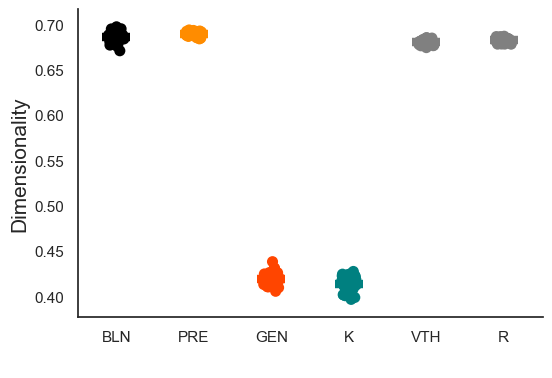

In [194]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors = ['black', 'darkorange','orangered', 'teal', 'grey', 'grey']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="condition", y="Dimensionality", data = dim_df, hue = 'condition', palette = colors, join=False, ci=2, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y="Dimensionality", data = dim_df, hue = 'condition', palette = colors, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Dimensionality', size = '15')
ax.legend_.remove()
#plt.ylim(0.5,1.3)
plt.show()

In [195]:
bln_dim = dim_df[dim_df['condition'] == 'BLN']
pre_dim = dim_df[dim_df['condition'] == 'PRE']
sz_dim = dim_df[dim_df['condition'] == 'GEN']

dim_list = bln_dim, pre_dim, sz_dim

In [196]:
from scipy import stats
data = bln_dim['Dimensionality']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.6861311745255199 0.000735275075046918


In [197]:
from scipy import stats
data = pre_dim['Dimensionality']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.6896700685202213 0.0003039702779234135


In [198]:
from scipy import stats
data = sz_dim['Dimensionality']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.41930942138092164 0.0008579803658134487


In [199]:
for i in range(len(dim_list)):
    p = stats.normaltest(dim_list[i]['Dimensionality'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


In [62]:
from scipy.stats import wilcoxon
alpha = 0.05/2

w, p = wilcoxon(bln_dim['Dimensionality'], sz_dim['Dimensionality'])
print('w = ' + str(w) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

w = 0.0   p = 1.9073486328125e-06
Samples are significantly different


In [75]:
k_list = np.arange(pre_k, o_k)
k_list

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29])

In [76]:
dim_list = list(range(len(k_list)))
count=0
for k in k_list:
    curr = np.zeros(50)
    for x in range(50):
        bind, spikes, volt, spike_mon = netfn.run_net(sim_time, k, o_vth, o_r, 
                                                      s, divisor, soften, N, dist, v_rest, 
                                                      t_syn_del, tau_l, N_e, lam, w_e)
    
        curr[x] = dim(bind.T)
    dim_list[count] = curr
    count+=1
    print('Done ' + str(k))
np.save(savepath + 'model_krange_dimensionality.npy', dim_list)

Done 6
Done 7
Done 8
Done 9
Done 10
Done 11
Done 12
Done 13
Done 14
Done 15
Done 16
Done 17
Done 18
Done 19
Done 20
Done 21
Done 22
Done 23
Done 24
Done 25
Done 26
Done 27
Done 28
Done 29


In [78]:
k_vals = ((k_list*2) / 8990) *100
k_vals

array([0.13348165, 0.15572859, 0.17797553, 0.20022247, 0.22246941,
       0.24471635, 0.26696329, 0.28921023, 0.31145717, 0.33370412,
       0.35595106, 0.378198  , 0.40044494, 0.42269188, 0.44493882,
       0.46718576, 0.4894327 , 0.51167964, 0.53392659, 0.55617353,
       0.57842047, 0.60066741, 0.62291435, 0.64516129])

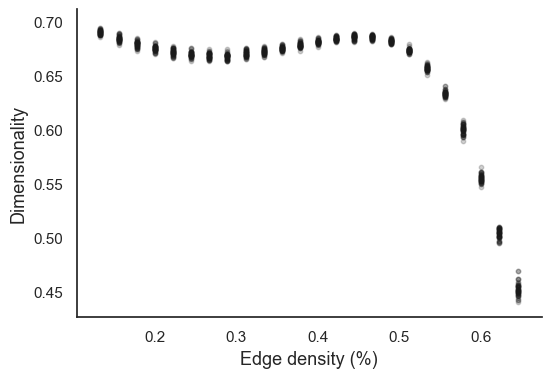

In [124]:
fig, axarr = plt.subplots(figsize = (6,4))
comb_k = []
comb_d = []
for e in range(len(dim_list[0])):
    plt.scatter(k_vals,np.array(dim_list)[:,e], c = 'k', s = 10, alpha = 0.2)
    comb_k = np.append(comb_k, k_vals)
    comb_d = np.append(comb_d, np.array(dim_list)[:,e])
    
axarr.set_ylabel('Dimensionality', size = '13')
axarr.set_xlabel('Edge density (%)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#plt.savefig(Ffig + 'dynrange_k.svg', transparent = True)
plt.show()

In [125]:
import scipy.stats
stats.pearsonr(comb_k, comb_d)

(-0.6626211112499625, 1.3762580963923316e-152)

In [152]:
vth_list = np.linspace(ov_vth, pre_vth, 24)[::-1]
vth_vals = vth_list

In [132]:
pre_vth, ov_vth

(16, 15)

In [140]:
ov_k = 6
ov_vth = 15
ov_r = 0
ov_k, ov_vth, ov_r

(6, 15, 0)

In [142]:
dim_list = list(range(len(vth_list)))
count=0
for vth in vth_list:
    curr = np.zeros(50)
    for x in range(50):
        bind, spikes, volt, spike_mon = netfn.run_net(sim_time, ov_k, vth, ov_r, 
                                                      s, divisor, soften, N, dist, v_rest, 
                                                      t_syn_del, tau_l, N_e, lam, w_e)
    
        curr[x] = dim(bind.T)
    dim_list[count] = curr
    count+=1
    print('Done ' + str(k))
np.save(savepath + 'model_vthrange_dimensionality.npy', dim_list)

Done 29
Done 29
Done 29
Done 29
Done 29
Done 29
Done 29
Done 29
Done 29
Done 29
Done 29
Done 29
Done 29
Done 29
Done 29
Done 29
Done 29
Done 29
Done 29
Done 29
Done 29
Done 29
Done 29
Done 29


In [151]:
prac = sorted(glob.glob('*vthrange*'))
curr = np.load(prac[0])

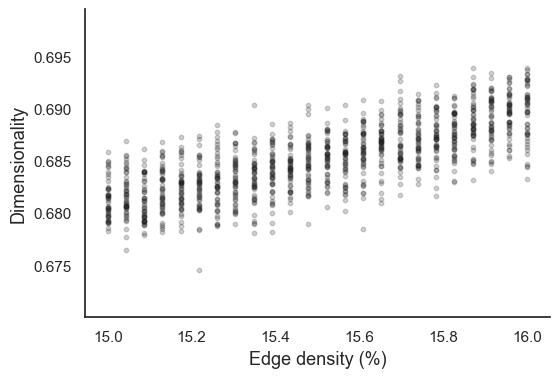

In [157]:
fig, axarr = plt.subplots(figsize = (6,4))
comb_vth = []
comb_d = []
for e in range(len(dim_list[0])):
    plt.scatter(vth_vals,np.array(curr)[:,e], c = 'k', s = 10, alpha = 0.2)
    comb_vth = np.append(comb_vth, vth_vals)
    comb_d = np.append(comb_d, np.array(curr)[:,e])
    
axarr.set_ylabel('Dimensionality', size = '13')
axarr.set_xlabel('Edge density (%)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#plt.savefig(Ffig + 'dynrange_k.svg', transparent = True)
plt.show()

In [158]:
import scipy.stats
stats.pearsonr(comb_vth, comb_d)

(0.7638386855723107, 4.573685588528723e-230)

In [145]:
r_list = np.linspace(or_r, pre_r, 24)
r_vals = r_list
r_vals

array([7.        , 6.69565217, 6.39130435, 6.08695652, 5.7826087 ,
       5.47826087, 5.17391304, 4.86956522, 4.56521739, 4.26086957,
       3.95652174, 3.65217391, 3.34782609, 3.04347826, 2.73913043,
       2.43478261, 2.13043478, 1.82608696, 1.52173913, 1.2173913 ,
       0.91304348, 0.60869565, 0.30434783, 0.        ])

In [143]:
dim_list = list(range(len(r_list)))
count=0
for r in r_list:
    curr = np.zeros(50)
    for x in range(50):
        bind, spikes, volt, spike_mon = netfn.run_net(sim_time, or_k, or_vth, r, 
                                                      s, divisor, soften, N, dist, v_rest, 
                                                      t_syn_del, tau_l, N_e, lam, w_e)
    
        curr[x] = dim(bind.T)
    dim_list[count] = curr
    count+=1
    print('Done ' + str(r))
np.save(savepath + 'model_rrange_dimensionality.npy', dim_list)

Done 7.0
Done 6.695652173913043
Done 6.391304347826087
Done 6.086956521739131
Done 5.782608695652174
Done 5.478260869565217
Done 5.173913043478261
Done 4.869565217391305
Done 4.565217391304348
Done 4.260869565217391
Done 3.9565217391304346
Done 3.652173913043478
Done 3.3478260869565215
Done 3.043478260869565
Done 2.7391304347826084
Done 2.4347826086956523
Done 2.1304347826086953
Done 1.8260869565217384
Done 1.5217391304347823
Done 1.2173913043478262
Done 0.9130434782608692
Done 0.6086956521739122
Done 0.3043478260869561
Done 0.0


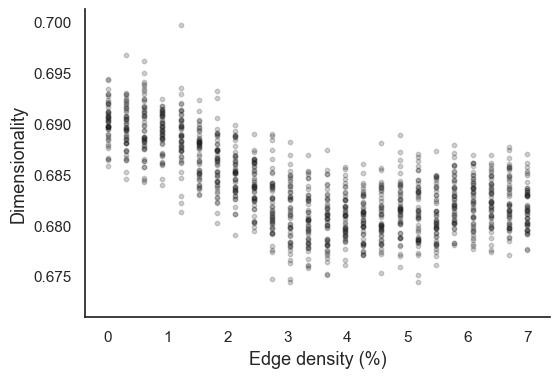

In [148]:
fig, axarr = plt.subplots(figsize = (6,4))
comb_r = []
comb_d = []
for e in range(len(dim_list[0])):
    plt.scatter(r_vals,np.array(dim_list)[:,e], c = 'k', s = 10, alpha = 0.2)
    comb_r = np.append(comb_r, r_vals)
    comb_d = np.append(comb_d, np.array(dim_list)[:,e])
    
axarr.set_ylabel('Dimensionality', size = '13')
axarr.set_xlabel('Edge density (%)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#plt.savefig(Ffig + 'dynrange_k.svg', transparent = True)
plt.show()

In [149]:
import scipy.stats
stats.pearsonr(comb_r, comb_d)

(-0.6432366565351411, 4.303902683504496e-141)

In [39]:
on_list = np.arange(5, 500, 10)
on_list

array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
       135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255,
       265, 275, 285, 295, 305, 315, 325, 335, 345, 355, 365, 375, 385,
       395, 405, 415, 425, 435, 445, 455, 465, 475, 485, 495])

In [43]:
k_list = np.arange(bln_k, o_k+1)
k_list

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30])

In [47]:
k_list = np.arange(30, o_k+1)
k_list

array([30])

In [48]:
dr_list = list(range(len(k_list)))

count=0
for k in k_list:
    curr = list(range(50))
    for x in range(50):
        dyn_r, out = dr_loop(k, o_vth, o_r, on_list)
        curr[x] = dyn_r,out
        
    dr_list[count] = curr
    np.save(savepath + 'model_krange-' + str(k) + '_dynrange.npy', curr)
    count+=1
    print('Done ' + str(k))

Done 30


In [44]:
def dr_loop(k, vth, r, on_list):
    import random
    outlist = list(range(len(on_list)))

    for x,n_on in enumerate(on_list):
    #Spike times + indices
        import random
        stim_time = 401
        n_input = N
        on_ind = random.sample(list(np.arange(0, n_input)), n_on)

        #Define synaptic connections from input - same across each stimulus size across network conditions
        input_A = np.zeros((N,N))
        np.fill_diagonal(input_A, 1)
        input_W = np.ones(input_A.shape)

        bind, bind_inp, bind_og = stim_net(sim_time, stim_time, n_on, on_ind, input_A, input_W, k, vth, r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
        sum_ = np.sum(bind_inp[:,stim_time]) - np.sum(bind[:,stim_time]) 
        if sum_ <0:
            outlist[x] = 0
        else:
            outlist[x] = sum_

    dyn_r, Smax, Smin, Omax, Omin, mean_out = dyn_range(np.array(outlist), on_list)
    

    return(dyn_r, mean_out)
  
def dyn_range(output_data, input_range):
    from sklearn.linear_model import LinearRegression
    mean_out = output_data
    range_out = np.max(mean_out) - np.min(mean_out)
    Omax = np.min(mean_out) + (0.9*range_out)
    Omin = np.min(mean_out) + (0.1*range_out)

    X = mean_out.reshape((-1, 1))
    y = input_range
    reg = LinearRegression().fit(X, y)
    Smax = reg.predict([[Omax]])
    Smin = reg.predict([[Omin]])
    dyn_r = 10*np.log10(Smax/Smin)
    return(dyn_r, Smax, Smin, Omax, Omin, mean_out)

In [24]:
bln_dr = dr_loop(bln_k, bln_vth, bln_r, on_list)
pre_dr = dr_loop(pre_k, pre_vth, pre_r, on_list)
sz_dr = dr_loop(sz_k, sz_vth, sz_r, on_list)
o_dr = dr_loop(o_k, o_vth, o_r, on_list)

In [26]:
bln_dr, pre_dr, sz_dr

(12.673684785988485, 11.092499362091909, 9.495761157487172)

In [27]:
o_dr

13.068666246329014

In [45]:
k_list = np.arange(1, sz_k)
k_list

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

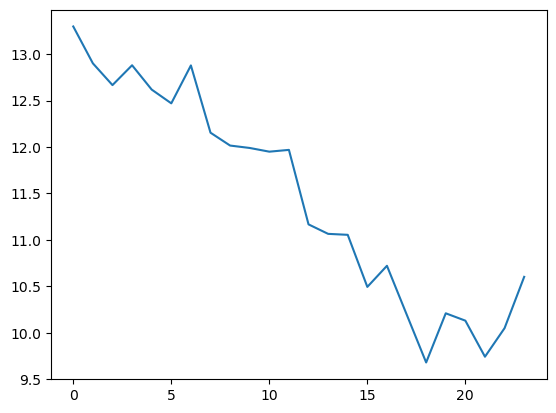

In [50]:
plt.plot(kdyn_list[:25])
plt.show()

In [49]:
kdyn_list

[13.29829913763971,
 12.90124384790194,
 12.666901056119857,
 12.88058149894709,
 12.618620783292016,
 12.470449158783232,
 12.878888509798374,
 12.154316656367314,
 12.01577123780884,
 11.989799137922418,
 11.949918801648886,
 11.96908593157923,
 11.166837035696254,
 11.06472815227076,
 11.054270949171856,
 10.4934321018809,
 10.720700287326638,
 10.199426398084492,
 9.67941081779125,
 10.209085934010055,
 10.12978683251797,
 9.741514251598664,
 10.049194158670916,
 10.601653788689916,
 nan,
 nan,
 26,
 27,
 28,
 29]

In [59]:
kdyn_list2

[nan, nan, 8.666025321692432, nan, nan, nan, nan, nan]

In [ ]:
vth_list = np.linspace(23, sz_vth, 20)
vth_list

In [ ]:
vthdyn_list = list(range(len(vth_list)))
for i,vth in enumerate(vth_list):
    vthdyn_list[i] = dr_loop(bln_k, vth, bln_r, on_list)
    print(i)

In [ ]:
r_list = np.linspace(7, sz_r, 20)
r_list

In [ ]:
rdyn_list = list(range(len(r_list)))
for i,r in enumerate(r_list):
    rdyn_list[i] = dr_loop(bln_k, bln_vth, r, on_list)
    print(i)

In [31]:
for i in range(50):
    bln_dr = dr_loop(bln_k, bln_vth, bln_r, on_list)
    print(bln_dr)

12.487074963125336
12.0828443922832
12.277051040177517
12.177116613718418
12.286556581004353
12.397918302849725
12.546328290829841
12.394059782969478
12.378783951016823
12.596000259442443
12.365824693671653
12.415919194569097
12.502653108948989


KeyboardInterrupt: 

In [29]:
for i in range(50):
    o_dr = dr_loop(o_k, o_vth, o_r, on_list)
    print(o_dr)

11.241156952688073
10.623286095739035
10.665829717283003
10.245836424590657
11.10417350604906
12.154095992747614
12.780742177821429
10.227375709294206
14.086910680076528
10.644958437894
11.328230459235508
12.40741541451006
9.418919223253031


KeyboardInterrupt: 

In [28]:
o_dr

13.068666246329014

In [37]:
def dr_loop(k, vth, r, on_list):
    import random
    outlist = list(range(len(on_list)))

    for x,n_on in enumerate(on_list):
    #Spike times + indices
        import random
        stim_time = 401
        n_input = N
        on_ind = random.sample(list(np.arange(0, n_input)), n_on)

        #Define synaptic connections from input - same across each stimulus size across network conditions
        input_A = np.zeros((N,N))
        np.fill_diagonal(input_A, 1)
        input_W = np.ones(input_A.shape)

        bind, bind_inp, bind_og = stim_net(sim_time, stim_time, n_on, on_ind, input_A, input_W, k, vth, r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
        outlist[x] = np.sum(bind_inp[:,stim_time]) - np.sum(bind[:,stim_time]) 

    dyn_r, Smax, Smin, Omax, Omin, mean_out = dyn_range(np.array(outlist), on_list)
    

    return(dyn_r, mean_out)
  
def dyn_range(output_data, input_range):
    from sklearn.linear_model import LinearRegression
    mean_out = output_data
    range_out = np.max(mean_out) - np.min(mean_out)
    Omax = np.min(mean_out) + (0.9*range_out)
    Omin = np.min(mean_out) + (0.1*range_out)

    X = mean_out.reshape((-1, 1))
    y = input_range
    reg = LinearRegression().fit(X, y)
    Smax = reg.predict([[Omax]])
    Smin = reg.predict([[Omin]])
    dyn_r = 10*np.log10(Smax/Smin)
    return(dyn_r, Smax, Smin, Omax, Omin, mean_out)

### Fit to baseline

In [298]:
alpha = 0.09
#BLN fit
empirical = bln_vec
mse_list_c = list(range(len(av_list)))
for i in range(len(av_list)):
    model = av_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 3,alpha)
    mse_list_c[i] = MSE_B 
    
bln_par = av_list[np.where(mse_list_c == np.min(mse_list_c))[0][0]][0]
bln_fit = av_list[np.where(mse_list_c == np.min(mse_list_c))[0][0]][1]
bln_mse =  np.min(mse_list_c)
bln_par, bln_mse

(['07', '20', 5], 0.11255861965070757)

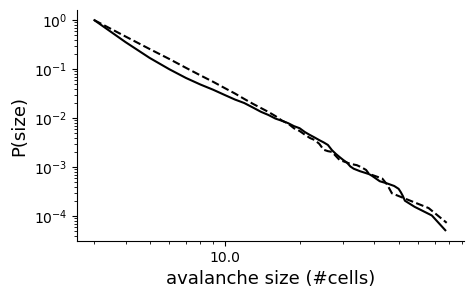

In [7]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = bln_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

### Fit to preseizure


In [247]:
#PRE fit
empirical = pre_vec
mse_list_c = list(range(len(av_list)))
for i in range(len(av_list)):
    model = av_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 3, alpha)
    mse_list_c[i] = MSE_B
    
pre_par = av_list[np.where(mse_list_c == np.min(mse_list_c))[0][0]][0]
pre_fit = av_list[np.where(mse_list_c == np.min(mse_list_c))[0][0]][1]
pre_mse =  np.min(mse_list_c)
pre_par, pre_mse

(['06', '16', 0], 0.1763710618853667)

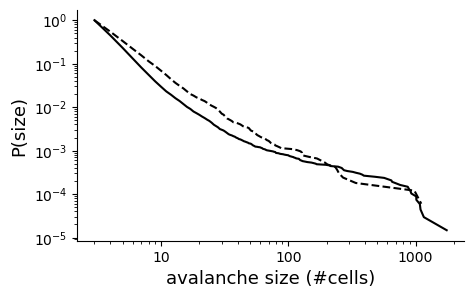

In [248]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = pre_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

### Fit to seizure


In [82]:
#SZ fit
empirical = p20_vec
mse_list_c = list(range(len(av_list)))
for i in range(len(av_list)):
    model = av_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 3, alpha)
    mse_list_c[i] = MSE_B
    
sz_par = av_list[np.where(mse_list_c == np.min(mse_list_c))[0][0]][0]
sz_fit = av_list[np.where(mse_list_c == np.min(mse_list_c))[0][0]][1]
sz_mse =  np.min(mse_list_c)
sz_par, sz_mse

(['31', '17', 1], 0.11964590052692564)

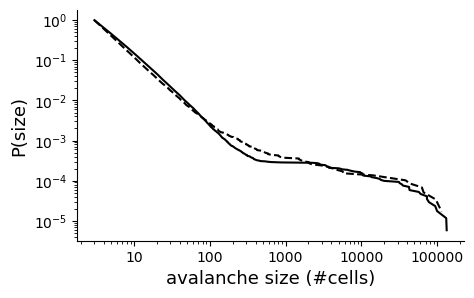

In [83]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = sz_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

## Baseline - preictal 

In [12]:
bln_k = 7
bln_vth = 20
bln_r = 5
bln_k, bln_vth, bln_r

(7, 20, 5)

### 2 parameters free

In [13]:
#K and Vth free
const_list = ['r']
val_list = ['5']
data = av_list
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [14]:
empirical = pre_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model,2, alpha)
    mse_list[i] = MSE_B
    
kvth_pre_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
kvth_pre_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
kvth_pre_mse = np.min(mse_list)
print(kvth_pre_par)
print('MSE = ' + str(np.min(kvth_pre_mse)))

['06', '18', 5]
MSE = 0.21156637841836867


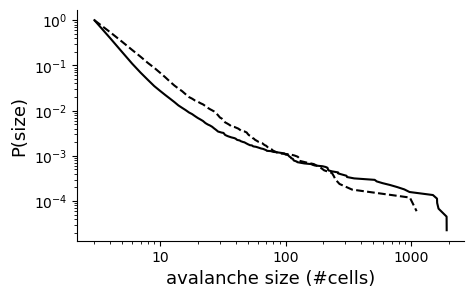

In [16]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = kvth_pre_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [17]:
#K and r free
const_list = ['v_th']
val_list = ['20']
data = av_list
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [18]:
empirical = pre_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 2, alpha)
    mse_list[i] = MSE_B
    
kr_pre_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
kr_pre_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
kr_pre_mse = np.min(mse_list)
print(kr_pre_par)
print('MSE = ' + str(np.min(kr_pre_mse)))

['09', '20', 4]
MSE = 0.19616261215068936


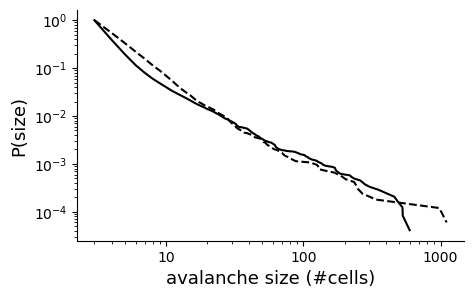

In [19]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = kr_pre_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [20]:
#vth and r free
const_list = ['k']
val_list = ['07']
data = av_list
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [25]:
empirical = pre_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model,2, alpha)
    mse_list[i] = MSE_B
    
vthr_pre_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
vthr_pre_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
vthr_pre_mse = np.min(mse_list)
print(vthr_pre_par)
print('MSE = ' + str(np.min(vthr_pre_mse)))

['07', '19', 4]
MSE = 0.22307113765428127


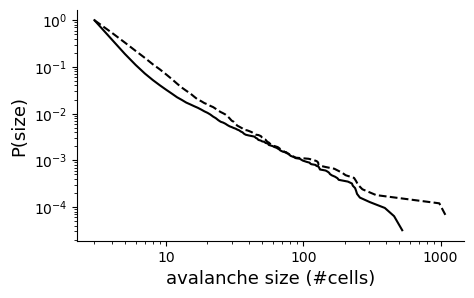

In [26]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = vthr_pre_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

### 1 parameter free

In [27]:
bln_k = '07'
bln_vth = '20'
bln_r = '5'
bln_k, bln_vth, bln_r

('07', '20', '5')

In [28]:
#k free
const_list = ['v_th', 'r']
val_list = [bln_vth, bln_r]
data = av_list
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [29]:
empirical = pre_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 1, alpha)
    mse_list[i] = MSE_B
    
k_pre_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
k_pre_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
k_pre_mse = np.min(mse_list)
print(k_pre_par)
print('MSE = ' + str(np.min(k_pre_mse)))

['15', '20', 5]
MSE = 0.2408534472651233


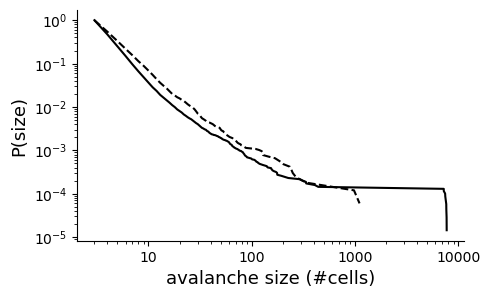

In [30]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = k_pre_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [31]:
#vth free
const_list = ['k', 'r']
val_list = [bln_k, bln_r]
data = av_list
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [32]:
empirical = pre_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model,1, alpha)
    mse_list[i] = MSE_B
    
vth_pre_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
vth_pre_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
vth_pre_mse = np.min(mse_list)
print(vth_pre_par)
print('MSE = ' + str(np.min(vth_pre_mse)))

['07', '19', 5]
MSE = 0.2234666572836279


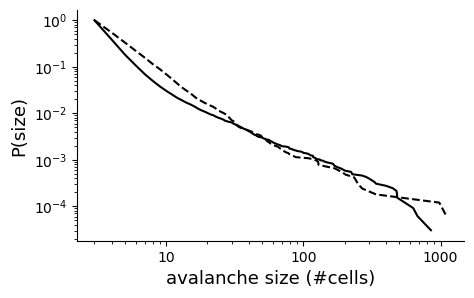

In [33]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = vth_pre_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [34]:
#r free
const_list = ['k', 'v_th']
val_list = [bln_k, bln_vth]
data = av_list
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [35]:
empirical = pre_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 1,alpha)
    mse_list[i] = MSE_B
    
r_pre_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
r_pre_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
r_pre_mse = np.min(mse_list)
print(r_pre_par)
print('MSE = ' + str(np.min(r_pre_mse)))

['07', '20', 6]
MSE = 1.0595816410003382


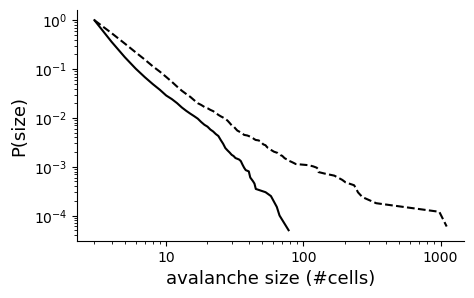

In [36]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = r_pre_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

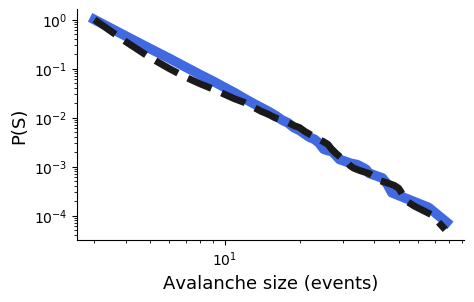

In [68]:
from matplotlib import cm
fig, axarr = plt.subplots(figsize = (5,3))
labels = ['10$^1$','10$^1$','10$^1$','10$^2$', '10$^3$', '10$^4$', '10$^5$','10$^6$'] 
sns.reset_orig()

avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =7 , markersize = 1, alpha = 1, c = 'royalblue')
av = bln_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =5 , markersize = 1, alpha = 1, c = 'k') 


axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xticklabels(labels)
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig(Ffig + 'netmod_bln_allpar.svg', transparent = True)
plt.show()

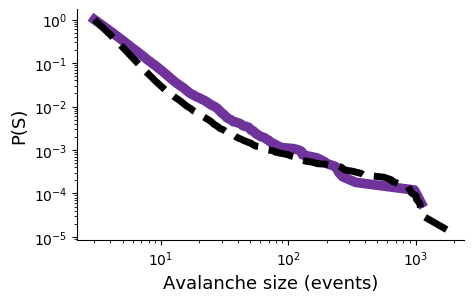

In [37]:
from matplotlib import cm
fig, axarr = plt.subplots(figsize = (5,3))
labels = ['10$^1$','10$^1$','10$^1$','10$^2$', '10$^3$', '10$^4$', '10$^5$','10$^6$'] 
sns.reset_orig()

avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =7 , markersize = 1, alpha = 0.8, c = 'indigo')
av = pre_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =5 , markersize = 1, alpha = 1, c = 'k') 


axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xticklabels(labels)
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig(Ffig + 'netmod_pre_allpar.svg', transparent = True)
plt.show()

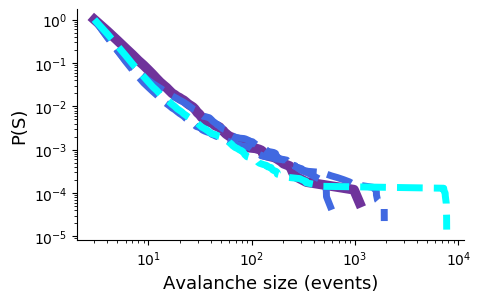

In [38]:
from matplotlib import cm
fig, axarr = plt.subplots(figsize = (5,3))
labels = ['10$^1$','10$^1$','10$^1$','10$^2$', '10$^3$', '10$^4$', '10$^5$','10$^6$'] 

k_col = 'royalblue'
sns.reset_orig()

avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =7 , markersize = 1, alpha = 0.8, c = 'indigo')

av = kvth_pre_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =5 , markersize = 1, alpha =1, c = k_col) 
av = kr_pre_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =5 , markersize = 1, alpha = 1, c = k_col)
av = k_pre_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =5 , markersize = 1, alpha = 1, c = 'cyan') 

axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_xticklabels(labels)
plt.savefig(Ffig + 'netmod_pre_k.svg', transparent = True)

plt.show()

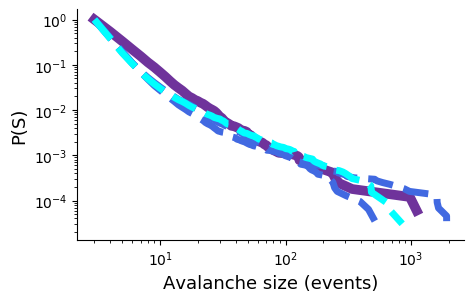

In [39]:
from matplotlib import cm
fig, axarr = plt.subplots(figsize = (5,3))
k_col = 'royalblue'
labels = ['10$^1$','10$^1$','10$^1$','10$^2$', '10$^3$', '10$^4$', '10$^5$','10$^6$'] 

sns.reset_orig()

avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =7 , markersize = 1, alpha = 0.8, c = 'indigo')

av = kvth_pre_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =5 , markersize = 1, alpha =1, c = k_col) 
av = vthr_pre_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =5 , markersize = 1, alpha = 1, c = k_col)
av = vth_pre_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =5 , markersize = 1, alpha = 1, c = 'cyan') 

axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xticklabels(labels)
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig(Ffig + 'netmod_pre_vth.svg', transparent = True)
plt.show()

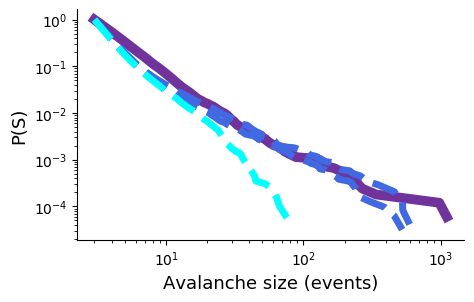

In [40]:
from matplotlib import cm
fig, axarr = plt.subplots(figsize = (5,3))
sns.reset_orig()

avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =7 , markersize = 1, alpha = 0.8, c = 'indigo')


av = kr_pre_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =5 , markersize = 1, alpha = 1, c = k_col)

av = vthr_pre_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =5 , markersize = 1, alpha = 1, c = k_col)
av = r_pre_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =5 , markersize = 1, alpha = 1, c = 'cyan') 


axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_xticklabels(labels)
plt.savefig(Ffig + 'netmod_pre_r.svg', transparent = True)

plt.show()

## Preictal - ictal 

In [37]:
pre_k = '06'
pre_vth = '16'
pre_r = '0'
pre_k, pre_vth, pre_r

('06', '16', '0')

### 2 parameters free

In [38]:
#K and Vth free
const_list = ['r']
val_list = [pre_r]
data = av_list
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [39]:
empirical = p20_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 2,alpha)
    mse_list[i] = MSE_B
    
kvth_sz_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
kvth_sz_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
kvth_sz_mse = np.min(mse_list)
print(kvth_sz_par)
print('MSE = ' + str(np.min(kvth_sz_mse)))

['33', '17', 0]
MSE = 0.15896572690273386


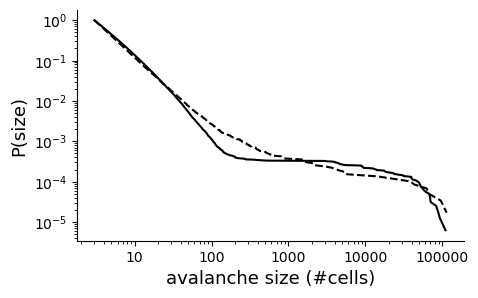

In [40]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = kvth_sz_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [41]:
#K and r free
const_list = ['v_th']
val_list = [pre_vth]
data = av_list
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [42]:
empirical = p20_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 2,alpha)
    mse_list[i] = MSE_B
    
kr_sz_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
kr_sz_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
kr_sz_mse = np.min(mse_list)
print(kr_sz_par)
print('MSE = ' + str(np.min(kr_sz_mse)))

['15', '16', 7]
MSE = 0.16013689065047


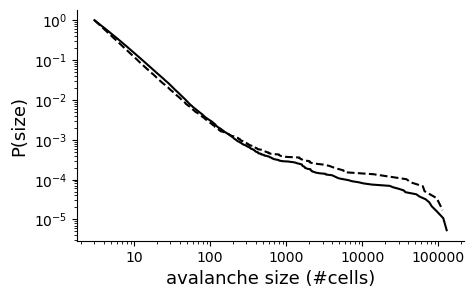

In [43]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = kr_sz_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [44]:
#vth and r free
const_list = ['k']
val_list = [pre_k]
data = av_list
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [45]:
empirical = p20_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model,2, alpha)
    mse_list[i] = MSE_B
    
vthr_sz_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
vthr_sz_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
vthr_sz_mse = np.min(mse_list)
print(vthr_sz_par)
print('MSE = ' + str(np.min(vthr_sz_mse)))

['06', '17', 6]
MSE = 0.4288571461200695


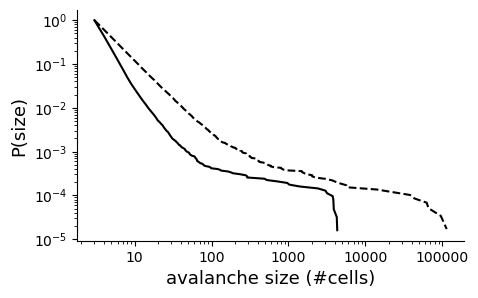

In [46]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = vthr_sz_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

### 1 parameter free

In [47]:
#k free
const_list = ['r', 'v_th']
val_list = [pre_r, pre_vth]
data = av_list
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [48]:
empirical = p20_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 1, alpha)
    mse_list[i] = MSE_B
    
k_sz_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
k_sz_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
k_sz_mse = np.min(mse_list)
print(k_sz_par)
print('MSE = ' + str(np.min(k_sz_mse)))

['30', '16', 0]
MSE = 0.19047626325960737


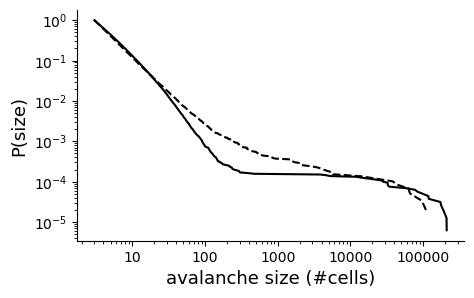

In [49]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = k_sz_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [50]:
#vth free
const_list = ['r', 'k']
val_list = [pre_r, pre_k]
data = av_list
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [51]:
empirical = p20_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 1, alpha)
    mse_list[i] = MSE_B
    
vth_sz_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
vth_sz_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
vth_sz_mse = np.min(mse_list)
print(vth_sz_par)
print('MSE = ' + str(np.min(vth_sz_mse)))

['06', '15', 0]
MSE = 0.7435775253454853


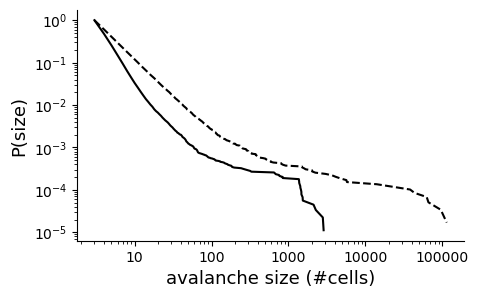

In [52]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = vth_sz_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [53]:
#r free
const_list = ['v_th','k']
val_list = [pre_vth, pre_k]
data = av_list
sub_list = netfn.sub_sweep(data, const_list, val_list)

In [54]:
empirical = p20_vec
mse_list = list(range(len(sub_list)))
for i in range(len(mse_list)):
    model = sub_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 1,alpha)
    mse_list[i] = MSE_B
    
r_sz_par = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][0]
r_sz_fit = sub_list[np.where(mse_list == np.min(mse_list))[0][0]][1]
r_sz_mse = np.min(mse_list)
print(r_sz_par)
print('MSE = ' + str(np.min(r_sz_mse)))

['06', '16', 7]
MSE = 0.46151614409489883


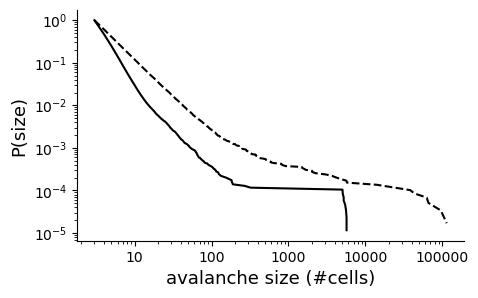

In [55]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = r_sz_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

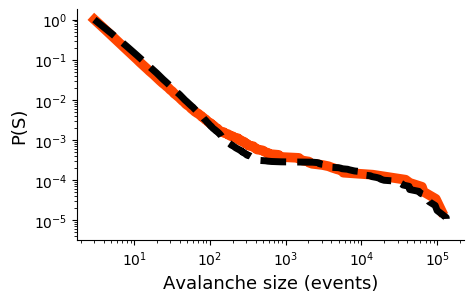

In [62]:
from matplotlib import cm
fig, axarr = plt.subplots(figsize = (5,3))
labels = ['10$^1$','10$^1$','10$^1$','10$^2$', '10$^3$', '10$^4$', '10$^5$','10$^6$'] 
k_col = 'k'
other_col = 'dodgerblue'
sns.reset_orig()

avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =7 , markersize = 1, alpha = 1, c = 'orangered')
av = sz_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =5 , markersize = 1, alpha = 1, c = 'k') 


axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xticklabels(labels)
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig(Ffig + 'netmod_sz_allpar.svg', transparent = True)
plt.show()

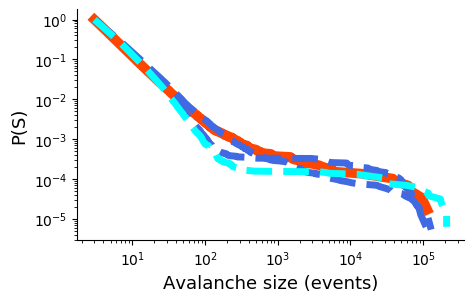

In [63]:
from matplotlib import cm
fig, axarr = plt.subplots(figsize = (5,3))
labels = ['10$^1$','10$^1$','10$^1$','10$^2$', '10$^3$', '10$^4$', '10$^5$','10$^6$'] 

k_col = 'royalblue'
sns.reset_orig()

avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =7 , markersize = 1, alpha = 1, c = 'orangered')


av = kvth_sz_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =5 , markersize = 1, alpha =1, c = k_col) 
av = kr_sz_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =5 , markersize = 1, alpha = 1, c = k_col)
av = k_sz_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =5 , markersize = 1, alpha = 1, c = 'cyan') 

axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_xticklabels(labels)
plt.savefig(Ffig + 'netmod_sz_k.svg', transparent = True)
plt.show()

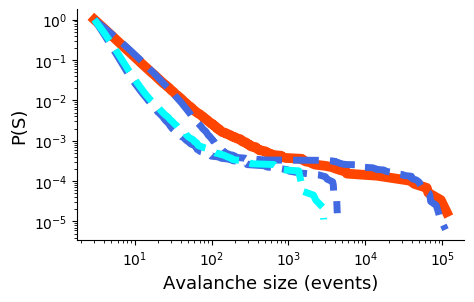

In [64]:
from matplotlib import cm
fig, axarr = plt.subplots(figsize = (5,3))
k_col = 'royalblue'
sns.reset_orig()

avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =7 , markersize = 1, alpha = 1, c = 'orangered')

av = kvth_sz_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =5 , markersize = 1, alpha =1, c = k_col) 
av = vthr_sz_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =5 , markersize = 1, alpha = 1, c = k_col)
av = vth_sz_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =5 , markersize = 1, alpha = 1, c = 'cyan') 


axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_xticklabels(labels)

plt.savefig(Ffig + 'netmod_sz_vth.svg', transparent = True)

plt.show()

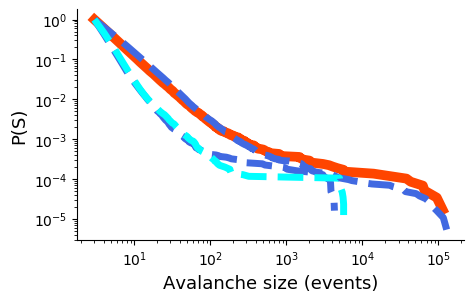

In [65]:
from matplotlib import cm
fig, axarr = plt.subplots(figsize = (5,3))
sns.reset_orig()

avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =7 , markersize = 1, alpha = 1, c = 'orangered')


av = kr_sz_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =5 , markersize = 1, alpha = 1, c = k_col)

av = vthr_sz_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =5 , markersize = 1, alpha = 1, c = k_col)
av = r_sz_fit
powerlaw.plot_ccdf(av, linestyle = '--',linewidth =5 , markersize = 1, alpha = 1, c = 'cyan') 


axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_xticklabels(labels)

plt.savefig(Ffig + 'netmod_sz_r.svg', transparent = True)

plt.show()

# Model comparison

In [84]:
pre_mse_list = [pre_mse, kr_pre_mse, kvth_pre_mse, vthr_pre_mse, k_pre_mse, r_pre_mse, vth_pre_mse]
pre_av_list = [pre_fit, kr_pre_fit, kvth_pre_fit, vthr_pre_fit, k_pre_fit, r_pre_fit, vth_pre_fit]
sz_mse_list = [sz_mse, kr_sz_mse, kvth_sz_mse, vthr_sz_mse, k_sz_mse, r_sz_mse, vth_sz_mse]
sz_av_list = [sz_fit, kr_sz_fit, kvth_sz_fit, vthr_sz_fit, k_sz_fit, r_sz_fit, vth_sz_fit]
name_list = ['all', 'm + r', 'm + Vth','Vth + r', 'm', 'r', 'Vth']
par_list = [3, 2, 2, 2, 1, 1, 1]
n_obv = 100000

#def AIC(mse, k, n):
#    return(n*(np.log(mse)) + (2*k))

def AIC(mse, k, n):
    return(mse + k*((n-1)/(n-k)))

def AIC(mse, k, n):
    return(mse + k*((n-1)/(n-k)))

curr_av = pre_av_list
curr_mse = pre_mse_list
AIC_list = list(range(len(curr_av)))
for i in range(len(curr_av)):
    AIC_list[i] = AIC(curr_mse[i], par_list[i], n_obv)


pre_mse_df = {}
pre_mse_df = pd.DataFrame({"MSE":pre_mse_list , "Labels":  name_list})
pre_aic_df = {}
pre_aic_df = pd.DataFrame({"AIC":AIC_list , "Labels":  name_list})

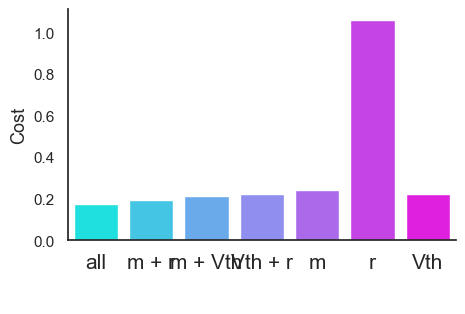

In [91]:
from matplotlib.collections import PathCollection
colors = cm.cool(np.linspace(0, 1, len(pre_mse_df)))
sns.set(style="white")
fig, axarr = plt.subplots(figsize = (5,3))
ax = sns.barplot(x="Labels", y="MSE", data = pre_mse_df, hue = 'Labels', palette = colors, dodge = False)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '20')
ax.set_ylabel('Cost', size = '13')
ax.set_xticklabels(name_list, size = 15)
ax.legend_.remove()
plt.savefig(Ffig + 'model_cost_pre.svg', transparent = True)
plt.show()


In [92]:
curr_av = sz_av_list
curr_mse = sz_mse_list
AIC_list = list(range(len(curr_av)))
for i in range(len(curr_av)):
    AIC_list[i] = AIC(curr_mse[i], par_list[i], n_obv)


sz_mse_df = {}
sz_mse_df = pd.DataFrame({"MSE":sz_mse_list , "Labels":  name_list})
sz_aic_df = {}
sz_aic_df = pd.DataFrame({"AIC":AIC_list , "Labels":  name_list})

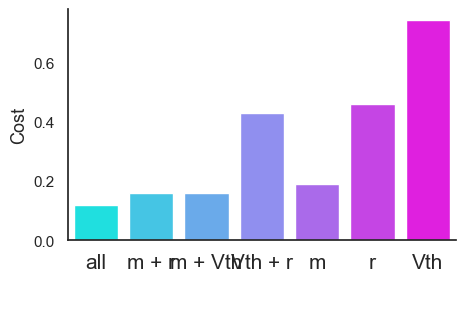

In [93]:
from matplotlib.collections import PathCollection
colors = cm.cool(np.linspace(0, 1, len(pre_mse_df)))
sns.set(style="white")
fig, axarr = plt.subplots(figsize = (5,3))
ax = sns.barplot(x="Labels", y="MSE", data = sz_mse_df, hue = 'Labels', palette = colors, dodge = False)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '20')
ax.set_ylabel('Cost', size = '13')
ax.set_xticklabels(name_list, size = 15)
ax.legend_.remove()
plt.savefig(Ffig + 'model_cost_sz.svg', transparent = True)
plt.show()


# Make it critical

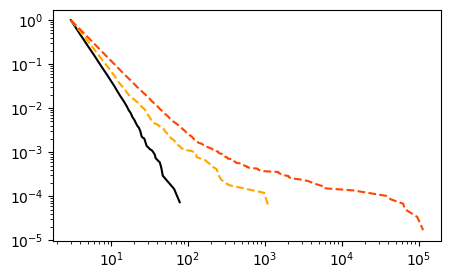

In [13]:
# Choose path and create lists of coord and trace files

# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_randbase*av.npy*'))
prelist = sorted(glob.glob('*PTZ20*_preictal*av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_ictal*av.npy*'))

choose = 0
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
pre_distlist = [np.load(prelist[i])[choose] for i in range(len(prelist))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_vec_s = []
pre_vec_s = []
p20_vec_s = []
for i in range(len(bln_distlist)):
    bln_vec_s = np.append(bln_vec_s, bln_distlist[i])
    pre_vec_s = np.append(pre_vec_s, pre_distlist[i])
    p20_vec_s = np.append(p20_vec_s, p20_distlist[i])
    
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (5,3))
sns.reset_orig()
avdistcut = bln_vec_s
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'k')
sns.reset_orig()
avdistcut = pre_vec_s
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_vec_s
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orangered')

plt.show()

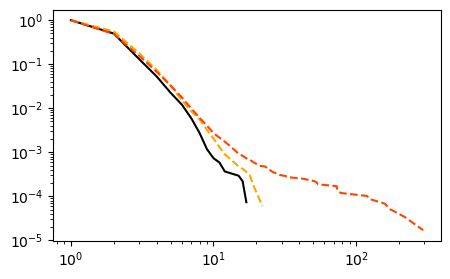

In [14]:
# Choose path and create lists of coord and trace files

# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_randbase*av.npy*'))
prelist = sorted(glob.glob('*PTZ20*_preictal*av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_ictal*av.npy*'))

choose = 1
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
pre_distlist = [np.load(prelist[i])[choose] for i in range(len(prelist))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_vec_d = []
pre_vec_d = []
p20_vec_d = []
for i in range(len(bln_distlist)):
    bln_vec_d = np.append(bln_vec_d, bln_distlist[i])
    pre_vec_d = np.append(pre_vec_d, pre_distlist[i])
    p20_vec_d = np.append(p20_vec_d, p20_distlist[i])
    
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (5,3))
sns.reset_orig()
avdistcut = bln_vec_d
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'k')
sns.reset_orig()
avdistcut = pre_vec_d
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_vec_d
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orangered')

plt.show()

In [34]:
bln_comb = bln_vec_s,bln_vec_d
pre_comb = pre_vec_s,pre_vec_d
sz_comb = p20_vec_s,p20_vec_d
av_list = np.array(bln_comb), np.array(pre_comb), np.array(sz_comb)
for i in range(len(av_list)):
    curr_av = av_list[i]
    dcc = crfn.DCC(curr_av)
    print(dcc)

0.10460918422830723
0.42631684298500416
0.5396041328257832


In [63]:
os.chdir(F10t + 'Project/' + experiment)
grid_list = sorted(glob.glob('*grid_search-2_av_nit9_*size*'))
grid_list[:10]

['grid_search-2_av_nit9_k-05_vth-15_r0-7_size.npy',
 'grid_search-2_av_nit9_k-05_vth-16_r0-7_size.npy',
 'grid_search-2_av_nit9_k-05_vth-17_r0-7_size.npy',
 'grid_search-2_av_nit9_k-05_vth-18_r0-7_size.npy',
 'grid_search-2_av_nit9_k-05_vth-19_r0-7_size.npy',
 'grid_search-2_av_nit9_k-05_vth-20_r0-7_size.npy',
 'grid_search-2_av_nit9_k-06_vth-15_r0-7_size.npy',
 'grid_search-2_av_nit9_k-06_vth-16_r0-7_size.npy',
 'grid_search-2_av_nit9_k-06_vth-17_r0-7_size.npy',
 'grid_search-2_av_nit9_k-06_vth-18_r0-7_size.npy']

In [64]:
#Combine into one giant list
av_list = list(range(len(grid_list)*8))
count = 0
for i in range(len(grid_list)):
    for e in range(8):
        k = grid_list[i][grid_list[i].find('k-')+2:grid_list[i].find('k-')+4]
        vth = grid_list[i][grid_list[i].find('vth-')+4:grid_list[i].find('vth-')+6]
        r = e
        av_list[count] = [[k, vth, r], np.load(grid_list[i], allow_pickle=True)[e]]
        count+=1

In [65]:
alpha = 0.09
#BLN fit
empirical = bln_vec_s
mse_list_c = list(range(len(av_list)))
for i in range(len(av_list)):
    model = av_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 3,alpha)
    mse_list_c[i] = MSE_B 
    
bln_par = av_list[np.where(mse_list_c == np.min(mse_list_c))[0][0]][0]
bln_fit = av_list[np.where(mse_list_c == np.min(mse_list_c))[0][0]][1]
bln_mse =  np.min(mse_list_c)
bln_par, bln_mse

(['12', '20', 1], 0.10752293978834604)

In [56]:
sum(np.unique(av_list[0][1]))

1.0

In [60]:
count=0
for i in range(len(av_list)):
    if sum(np.unique(av_list[0][1])) == 1:
        count+=1

In [61]:
len(av_list)

1344

In [62]:
count

1344

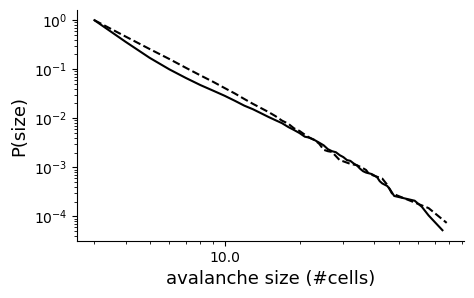

In [66]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = bln_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = bln_vec_s
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


In [ ]:
#PRE fit
empirical = pre_vec
mse_list_c = list(range(len(av_list)))
for i in range(len(av_list)):
    model = av_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 3, alpha)
    mse_list_c[i] = MSE_B
    
pre_par = av_list[np.where(mse_list_c == np.min(mse_list_c))[0][0]][0]
pre_fit = av_list[np.where(mse_list_c == np.min(mse_list_c))[0][0]][1]
pre_mse =  np.min(mse_list_c)
pre_par, pre_mse

fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = pre_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [ ]:
#SZ fit
empirical = p20_vec
mse_list_c = list(range(len(av_list)))
for i in range(len(av_list)):
    model = av_list[i][1]
    MSE_B, mse, var = netfn.MSE(empirical, model, 3, alpha)
    mse_list_c[i] = MSE_B
    
sz_par = av_list[np.where(mse_list_c == np.min(mse_list_c))[0][0]][0]
sz_fit = av_list[np.where(mse_list_c == np.min(mse_list_c))[0][0]][1]
sz_mse =  np.min(mse_list_c)
sz_par, sz_mse
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()
av = sz_fit
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()